# Latent Space Optimization Results Visualization

Show, analyze and visualize the LSO results.

## Image Grids

Visualize all available images of an optimization run.

### Optimized 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def grid_optimized(version, iters, idxs):
    """
    Plot a grid of optimized images.
    Args:
		version: string, version of the experiment
		iters: list of iteration numbers (rows)
		idxs:  list of sample indices (columns)
    """
    n_rows = len(iters)
    n_cols = len(idxs)
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(4 * n_cols, 4 * n_rows),  # ~4" per subplot
        squeeze=False
    )
    fig.subplots_adjust(hspace=0.4)

    # Load scores
    scores = np.load(f"../results/{version}/results.npz", allow_pickle=True)
    
    for i, it in enumerate(iters):
        for j, idx in enumerate(idxs):
            a = Image.open(f'/BS/optdif/work/results/{version}/data/samples/iter_{it}/img_opt/{idx}.png')
            ax_opt = axes[i][j]
            ax_opt.imshow(a)
            ax_opt.set_title(f"{scores['opt_point_properties'][it + idx].item():.2f}")
            ax_opt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
grid_optimized(
    version="ctrloralter_gbo_28",
    iters=list(range(0, 15, 5)),
    idxs=[0,1,2,3,4],
)

### Inital & Optimized 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def grid_initial_optimized(version, iters, idxs):
    """
    Plot a grid of initially sampled and optimized images.
    Args:
		version: string, version of the experiment
		iters: list of iteration numbers (rows)
		idxs:  list of sample indices (columns)
    """
    n_rows = len(iters)
    n_cols = len(idxs)
    fig, axes = plt.subplots(
        n_rows, n_cols * 2,
        figsize=(4 * n_cols * 2, 4 * n_rows),  # ~4" per subplot
        squeeze=False
    )
    fig.subplots_adjust(hspace=0.4)

    # Load scores
    scores = np.load(f"../results/{version}/results.npz", allow_pickle=True)
    
    for i, it in enumerate(iters):
        for j, idx in enumerate(idxs):
            # Left: initially sampled
            a = Image.open(f'/BS/optdif/work/results/{version}/data/samples/iter_{it}/img_init/{idx}.png')
            ax_init = axes[i][2*j]
            ax_init.imshow(a)
            ax_init.set_title(f"Initial ({scores['init_point_properties'][it + idx].item():.2f})")
            ax_init.axis('off')

            # Right: optimized
            b = Image.open(f'/BS/optdif/work/results/{version}/data/samples/iter_{it}/img_opt/{idx}.png')
            ax_opt = axes[i][2*j + 1]
            ax_opt.imshow(b)
            ax_opt.set_title(f"Optimized ({scores['opt_point_properties'][it + idx].item():.2f})")
            ax_opt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
grid_initial_optimized(
    version="ctrloralter_dngo_03",
    iters=list(range(0, 15, 5)),
    idxs=[0,1,2,3,4],
)

### Original & Initial & Optimized

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def grid_original_initial_optimized(version, iters, idxs):
    """
    Plot a grid of original, initially sampled, and optimized images.
    Args:
		version: string, version of the experiment
		iters: list of iteration numbers (rows)
		idxs:  list of sample indices (columns)
    """
    n_rows = len(iters)
    n_cols = len(idxs)
    fig, axes = plt.subplots(
        n_rows, n_cols * 3,
        figsize=(4 * n_cols * 3, 4 * n_rows),  # ~4" per subplot
        squeeze=False
    )
    fig.subplots_adjust(hspace=0.4)

    # Load scores
    scores = np.load(f"../results/{version}/results.npz", allow_pickle=True)
    
    for i, it in enumerate(iters):
        for j, idx in enumerate(idxs):
            # Left: original
            a = Image.open(f'/BS/optdif/work/results/{version}/data/samples/iter_{it}/img_orig/{idx}.png')
            ax_orig = axes[i][3*j]
            ax_orig.imshow(a)
            ax_orig.set_title(f"Iteration {it}  Top {idx}\nOriginal ({scores['orig_point_properties'][it + idx].item():.2f})")
            ax_orig.axis('off')

            # Middle: initially sampled
            b = Image.open(f'/BS/optdif/work/results/{version}/data/samples/iter_{it}/img_init/{idx}.png')
            ax_init = axes[i][3*j + 1]
            ax_init.imshow(b)
            ax_init.set_title(f"Initial ({scores['init_point_properties'][it + idx].item():.2f})")
            ax_init.axis('off')

            # Right: optimized
            c = Image.open(f'/BS/optdif/work/results/{version}/data/samples/iter_{it}/img_opt/{idx}.png')
            ax_opt = axes[i][3*j + 2]
            ax_opt.imshow(c)
            ax_opt.set_title(f"Optimized ({scores['opt_point_properties'][it + idx].item():.2f})")
            ax_opt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
grid_original_initial_optimized(
    version="ctrloralter_gbo_28",
    iters=list(range(0, 20, 5)),
    idxs=[0,1],
)

## Smile Scores Visualization

Plots available smile scores and statistics for each iteration.

### Optimized

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def scores_optimized(version):
	
	# Load results from the npz file
	results = np.load(f"../results/{version}/results.npz", allow_pickle=True)

	# Convert the npz file to a pandas DataFrame
	df = pd.DataFrame({
		'opt': list(results['opt_point_properties']),
		'model_version': list(results['opt_model_version']),
	})

	# Group by model version and aggregate
	df = df.groupby('model_version').agg({
		'opt': ['mean', 'min', 'max'],
	}).reset_index()

	fig, ax = plt.subplots(figsize=(10, 6))
	ax.plot(df['model_version'], df['opt']['mean'], marker='o', label='Optimized Mean')
	ax.fill_between(df['model_version'], df['opt']['min'], df['opt']['max'], alpha=0.2, label='Optimized Min-Max Range')
	ax.set_xlabel('Iteration')
	ax.set_ylabel('Values')
	ax.set_title('Mean Objective Values of the Top Five Samples per Iteration')
	ax.set_ylim(0, 5)
	ax.axhline(y=2, color='gray', linestyle='--', label='Input Max')
	ax.legend()
	plt.xticks(ticks=range(len(df['model_version'])), labels=df['model_version'], rotation=45)

	plt.tight_layout()
	plt.show()

In [ ]:
scores_optimized(version="ctrloralter_gbo_28")

### Initial & Optimized

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def scores_initial_optimized(version):
	
	# Load results from the npz file
	results = np.load(f"../results/{version}/results.npz", allow_pickle=True)

	# Convert the npz file to a pandas DataFrame
	df = pd.DataFrame({
		'opt': list(results['opt_point_properties']),
		'init': list(results['init_point_properties']),
		'model_version': list(results['opt_model_version']),
	})

	# Group by model version and aggregate
	df = df.groupby('model_version').agg({
		'opt': ['mean', 'min', 'max'],
		'init': ['mean', 'min', 'max']
	}).reset_index()

	fig, ax = plt.subplots(figsize=(10, 6))
	ax.plot(df['model_version'], df['opt']['mean'], marker='o', label='Optimized Mean')
	ax.fill_between(df['model_version'], df['opt']['min'], df['opt']['max'], alpha=0.2, label='Optimized Min-Max Range')
	ax.plot(df['model_version'], df['init']['mean'], marker='x', label='Initial Mean', linestyle=':')
	ax.set_xlabel('Iteration')
	ax.set_ylabel('Values')
	ax.set_title('Mean Objective Values of the Top Five Samples per Iteration')
	ax.set_ylim(0, 5)
	ax.axhline(y=2, color='gray', linestyle='--', label='Input Max')
	ax.legend()
	plt.xticks(ticks=range(len(df['model_version'])), labels=df['model_version'], rotation=45)

	plt.tight_layout()
	plt.show()

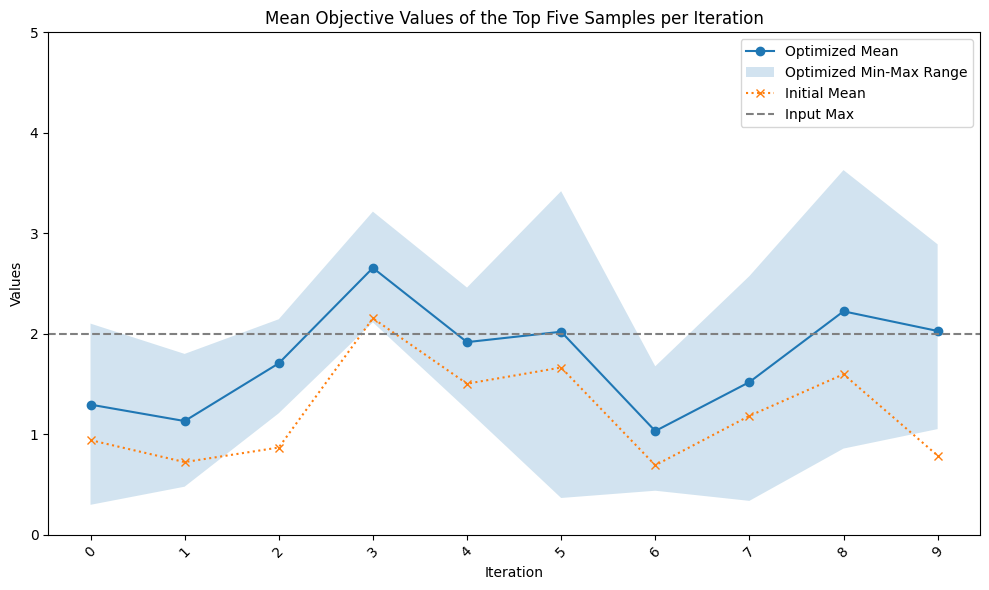

In [12]:
scores_initial_optimized(version="ctrloralter_gbo_28")

### Optimized & Initial & Original

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def scores_original_initial_optimized(version):

	# Load results from the npz file
	results = np.load(f"../results/{version}/results.npz", allow_pickle=True)

	# Convert the npz file to a pandas DataFrame
	df = pd.DataFrame({
		'opt': list(results['opt_point_properties']),
		'init': list(results['init_point_properties']),
		'orig': list(results['orig_point_properties']),
		'model_version': list(results['opt_model_version']),
	})

	# Group by model version and aggregate
	df = df.groupby('model_version').agg({
		'opt': ['mean', 'min', 'max'],
		'init': ['mean', 'min', 'max'],
		'orig': ['mean', 'min', 'max']
	}).reset_index()

	fig, ax = plt.subplots(figsize=(10, 6))
	ax.plot(df['model_version'], df['opt']['mean'], marker='o', label='Optimized Mean')
	ax.fill_between(df['model_version'], df['opt']['min'], df['opt']['max'], alpha=0.2, label='Optimized Min-Max Range')
	ax.plot(df['model_version'], df['orig']['mean'], marker='s', label='Original Mean', linestyle='--')
	ax.plot(df['model_version'], df['init']['mean'], marker='x', label='Initial Mean', linestyle=':')
	ax.set_xlabel('Iteration')
	ax.set_ylabel('Values')
	ax.set_title('Mean Objective Values of the Top Five Samples per Iteration')
	ax.set_ylim(0, 5)
	ax.axhline(y=2, color='gray', linestyle='--', label='Input Max')
	ax.legend()
	plt.xticks(ticks=range(len(df['model_version'])), labels=df['model_version'], rotation=45)

	plt.tight_layout()
	plt.show()

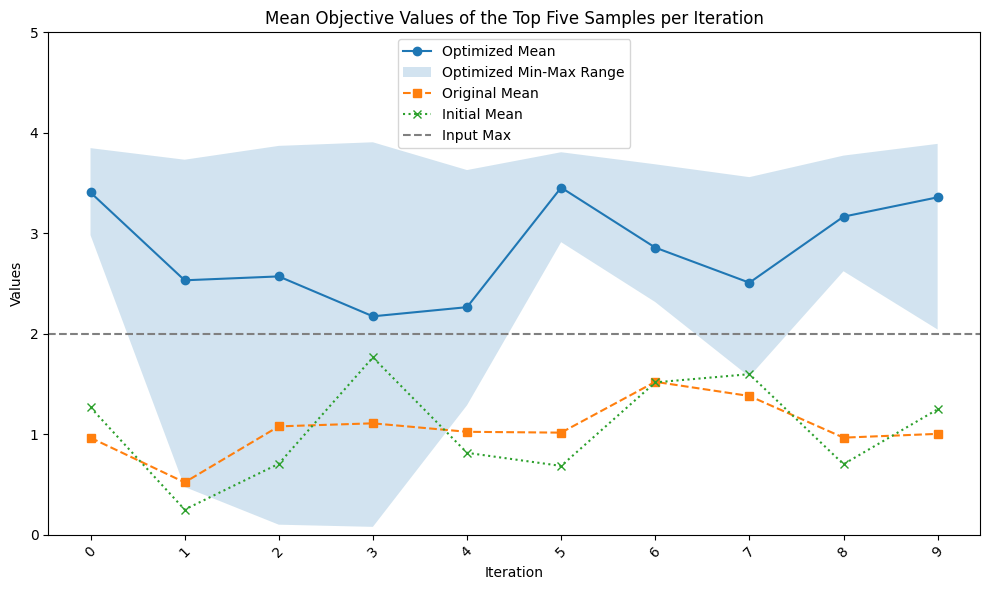

In [14]:
scores_original_initial_optimized("ctrloralter_gbo_23")

## Scores Compare

### Compare Optimized Multiple Versions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def scores_compare_optimized_mult_versions(version_dict):

	result_dict = {}
	min_iterations = np.inf

	for version, version_name in version_dict.items():
		# Load results from the npz file
		results = np.load(f"../results/{version}/results.npz", allow_pickle=True)

		# Convert the npz file to a pandas DataFrame
		df = pd.DataFrame({
			'opt': list(results['opt_point_properties']),
			'model_version': list(results['opt_model_version']),
		})

		# Group by model version and aggregate
		df = df.groupby('model_version').agg({'opt': 'mean'}).reset_index()

		# Load version
		version_name = version_name or f"Version {version}"

		# Store the results in the result_dict
		result_dict[version_name] = df['opt']

		# Update min_iterations
		min_iterations = min(min_iterations, len(df['model_version']))

	fig, ax = plt.subplots(figsize=(10, 6))

	for version_name, opt_values in result_dict.items():
		ax.plot(range(min_iterations), opt_values[:min_iterations], marker='o', label=f'{version_name}')

	ax.set_xlabel('Iteration')
	ax.set_ylabel('Values')
	ax.set_title('Mean Objective Values of Top Five Samples per Iteration')
	ax.set_ylim(0, 5)
	ax.axhline(y=2, color='gray', linestyle='--', label='Input Max')
	ax.legend()
	plt.xticks(ticks=range(min_iterations), labels=df['model_version'][:min_iterations], rotation=45)

	plt.tight_layout()
	plt.show()

In [ ]:
scores_compare_optimized_mult_versions({
    "ctrloralter_gbo_20": "LoRA Style",
    "ctrloralter_gbo_21": "LORA Style + Depth",
    "sd_gbo_03": "SD VAE",
    "latent_vqvae_gbo_06": "LatentVQVAE",
})

In [ ]:
scores_compare_optimized_mult_versions({
    "latent_vqvae_dngo_06": "Bayesian Optimization (DNGO)",
    "latent_vqvae_gbo_06": "Gradient-Based Optimization",
})

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

version_dict = {
    "ctrloralter_gbo_25": "Initial Style",
    "ctrloralter_gbo_26": "Finetuned Style",
    "ctrloralter_gbo_23": "Initial Style + Depth",
    "ctrloralter_gbo_24": "Finetuned Style + Depth",
    "ctrloralter_gbo_27": "Initial Style + HED",
    "ctrloralter_gbo_28": "Finetuned Style + HED",
}

result_dict = {}
min_iterations = np.inf

for version, version_name in version_dict.items():
	# Load results from the npz file
	results = np.load(f"../results/{version}/results.npz", allow_pickle=True)

	# Convert the npz file to a pandas DataFrame
	df = pd.DataFrame({
		'opt': list(results['opt_point_properties']),
		'model_version': list(results['opt_model_version']),
	})

	# Group by model version and aggregate
	df = df.groupby('model_version').agg({'opt': 'mean'}).reset_index()

	# Load version
	version_name = version_name or f"Version {version}"

	# Store the results in the result_dict
	result_dict[version_name] = df['opt']

	# Update min_iterations
	min_iterations = min(min_iterations, len(df['model_version']))

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(min_iterations), result_dict['Initial Style'][:min_iterations], marker='o', label=f'Initial Style', color='tab:blue', linestyle='--')
ax.plot(range(min_iterations), result_dict['Finetuned Style'][:min_iterations], marker='o', label=f'Finetuned Style', color='tab:blue')
ax.plot(range(min_iterations), result_dict['Initial Style + Depth'][:min_iterations], marker='o', label=f'Initial Style + Depth', color='tab:green', linestyle='--')
ax.plot(range(min_iterations), result_dict['Finetuned Style + Depth'][:min_iterations], marker='o', label=f'Finetuned Style + Depth', color='tab:green')
ax.plot(range(min_iterations), result_dict['Initial Style + HED'][:min_iterations], marker='o', label=f'Initial Style + HED', color='tab:orange', linestyle='--')
ax.plot(range(min_iterations), result_dict['Finetuned Style + HED'][:min_iterations], marker='o', label=f'Finetuned Style + HED', color='tab:orange')

ax.set_xlabel('Iteration')
ax.set_ylabel('Values')
ax.set_title('Mean Objective Values of Top Five Samples per Iteration')
ax.set_ylim(0, 5)
ax.axhline(y=2, color='gray', linestyle='--', label='Input Max')
ax.legend()
plt.xticks(ticks=range(min_iterations), labels=df['model_version'][:min_iterations], rotation=45)

plt.tight_layout()
plt.show()